<Body>   
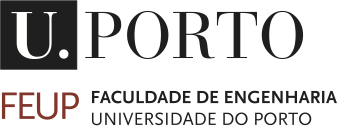   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** both the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 18** in your corresponding practical class. Upload the files until 23:59 of **March 27, 2024**.


---



In [611]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] Converting notebook ML_project1.ipynb to html


[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 2021204 bytes to ML_project1.html


# **Identification**

* **Group:** A06_B
* **Name:** Bruno Filipe Torres Costa
* **Student Number:** 202004966

* **Name:** André Silva Martins
* **Student Number:** 202006053


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [612]:
#!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
#!unzip dataset.csv.zip -d.


In [613]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.head(11)
df.tail()
#df

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
495,49.5,3.855108,-3.928327,-0.078142,-0.093745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,49.6,0.000000,0.000000,-0.088140,-0.103430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,49.7,0.000000,0.000000,-0.078002,-0.092986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,49.8,0.000000,0.000000,-0.076514,-0.091199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,49.9,0.000000,0.000000,-0.078499,-0.092891,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Visualize Data:**

Plot the data from the csv dataset

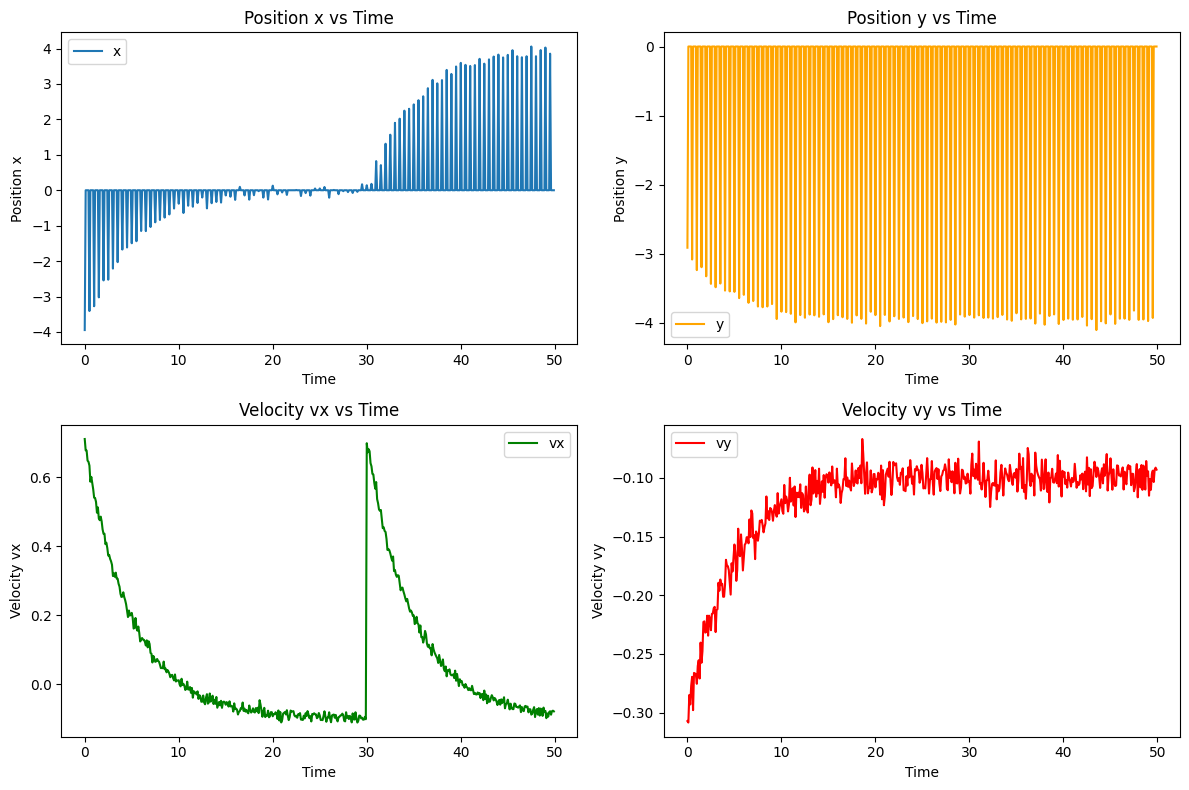

In [614]:
import numpy as np
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotting x
axs[0, 0].plot(time, x, label='x')
axs[0, 0].set_title('Position x vs Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Position x')
axs[0, 0].legend()

# Plotting y
axs[0, 1].plot(time, y, label='y', color='orange')
axs[0, 1].set_title('Position y vs Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Position y')
axs[0, 1].legend()

# Plotting vx
axs[1, 0].plot(time, vx, label='vx', color='green')
axs[1, 0].set_title('Velocity vx vs Time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Velocity vx')
axs[1, 0].legend()

# Plotting vy
axs[1, 1].plot(time, vy, label='vy', color='red')
axs[1, 1].set_title('Velocity vy vs Time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Velocity vy')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!

### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*

\begin{align*}
    \begin{bmatrix}
    x_{t+1} \\
    b_{x,t+1}
    \end{bmatrix}
    &= \begin{bmatrix}
    1 &h \\
    0 &1
    \end{bmatrix}

    \begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t} + w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &=
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}


*y-direction*

\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &=
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1**
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [615]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import det

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values



In [616]:
def kf_predict(X, P, A, Q, B, U):
    """
      X : The mean state estimate of the previous step (k−1) - shape(m,1)
      P : The state covariance of previous step (k−1) - shape(m,m)
      A : The transition  matrix - shape(m,m)
      Q : The process noise covariance matrix - shape(m,m)
      B : The input effect matrix - shape(p, m)
      U : The control input - shape(q,1)
    """
    X = A @ X + B @ U
    P = A @ P @ A.T + Q
    return(X,P)

def kf_update(X, P, Y, H, R):
    """
      K  : the Kalman Gain matrix
      IS : the Covariance or predictive mean of Y
    """
    IS = H @ P @ H.T + R
    K = P @ H.T @ inv(IS)
    X = X + K @ (Y - H @ X)
    P = P - K @ IS @ K.T
    return (X,P)

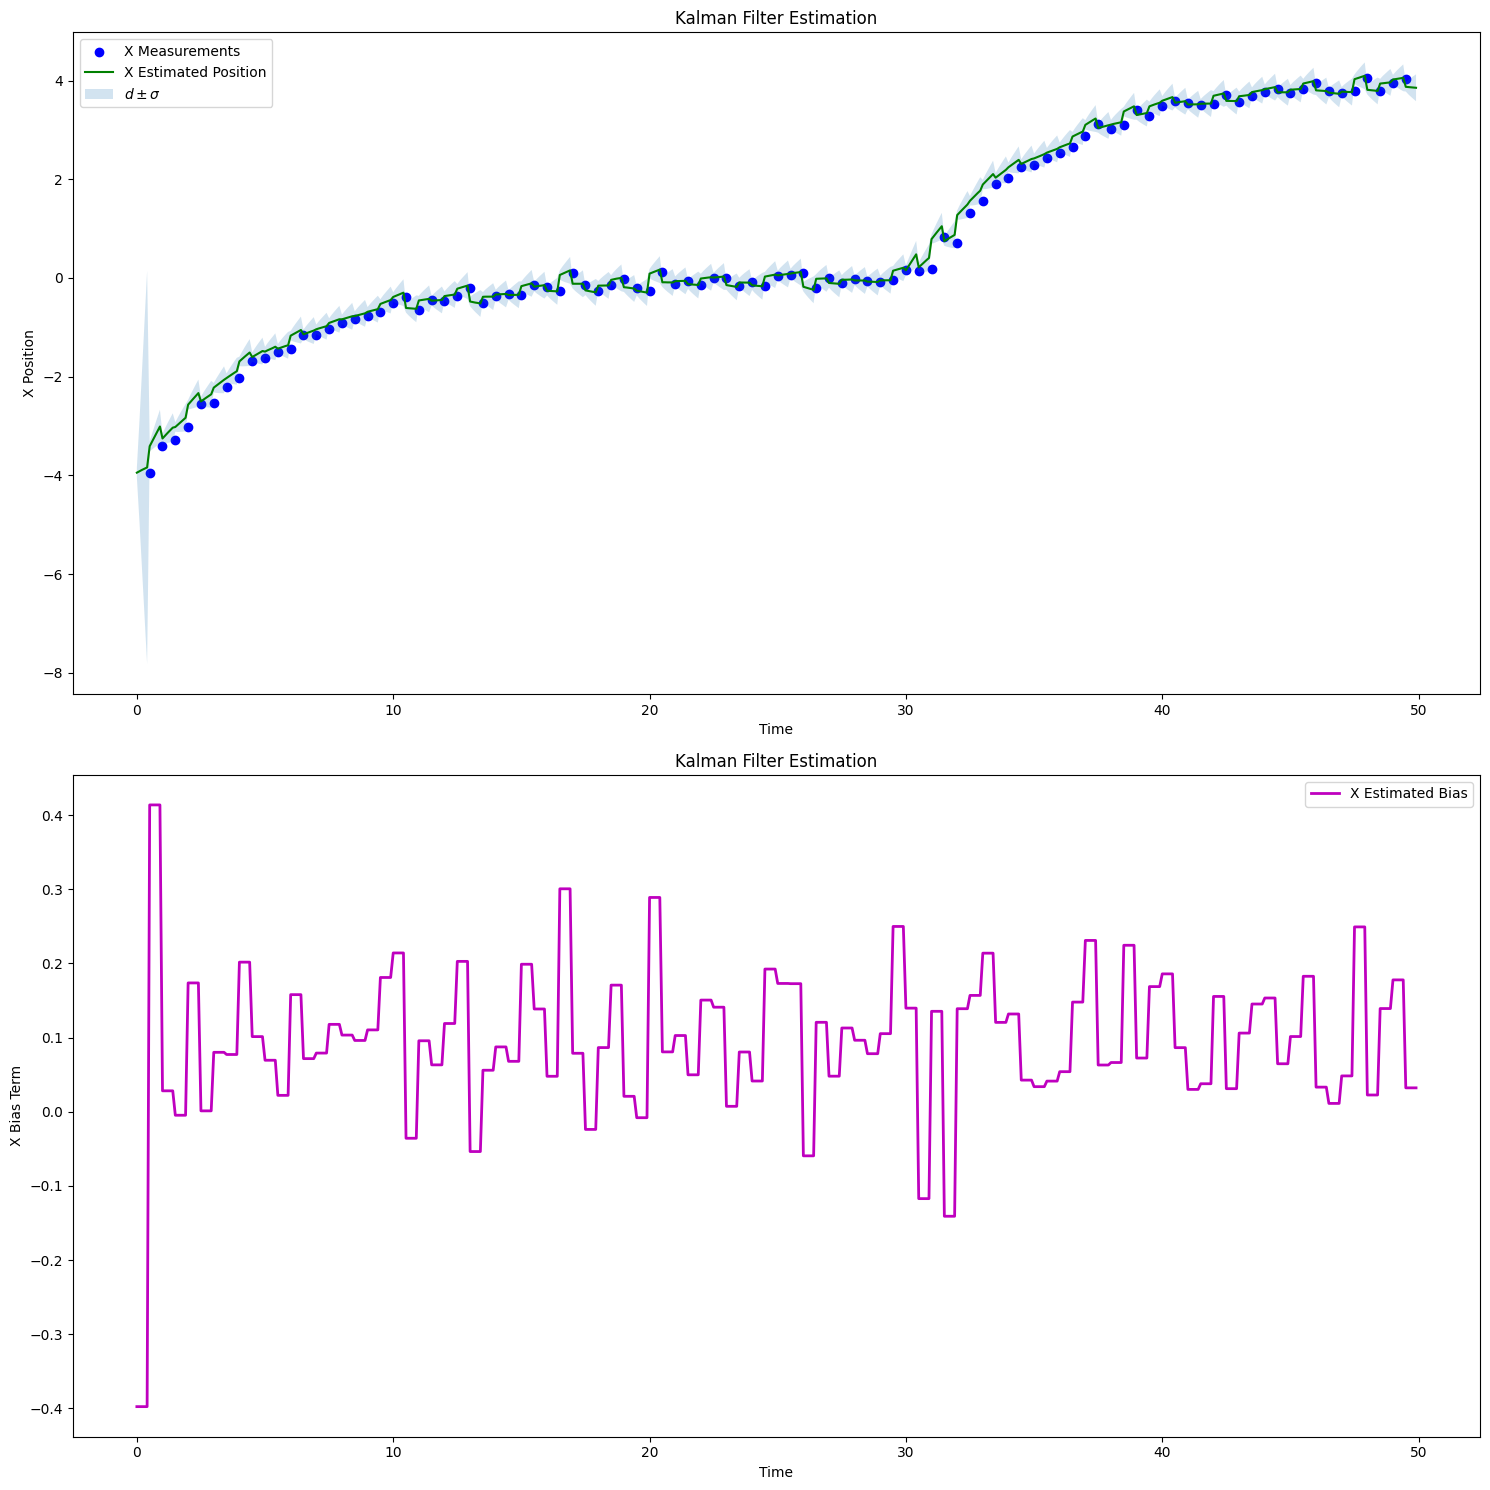

In [617]:

#Inter sample time
dt = time[1] - time[0]

bias_x = 0
# init state
X = np.array([ [0], [bias_x] ])

# ini Covar
P = np.array( [ [ 1, 0.0],
                [ 0.0, 1] ]) * 100

# state matrix
A = np.array( [ [ 1, dt ],
                [ 0.0, 1] ])

# input effect matrix
B = np.array( [ [dt], [0.0] ])

# meas matrix
H = np.array( [ [1.0, 0.0] ])

# meas noise
R = np.array( [ [1.0] ]) * 0.01

# process noise
Q = np.array(np.eye(2) * 0.01 )

# Kalman Filter loop

N_iter = len(time)    # implies dt*N_iter seconds

estimated_x = []
estimated_x_bias = []
d_up_time = []
d_dn_time = []
for t in arange(0, N_iter):

  # Predict State
  U = np.array( [ [vx[t]] ])
  (X, P) = kf_predict(X, P, A, Q, B, U)

  # Update State
  if t%5 ==0:
    Z = np.array( [ [x[t]] ])
    (X, P) = kf_update(X, P, Z, H, R)


  # Save the estimated position for plotting
  estimated_x.append(X[0])
  estimated_x_bias.append(X[1])
  d_up_time.append( X[0].item() + sqrt( P[0][0]).item() )
  d_dn_time.append( X[0].item() - sqrt( P[0][0]).item() )


# End For Loop
estimated_x = np.array(estimated_x)
estimated_x_bias = np.array(estimated_x_bias)

# Convert the array to a numpy array for easier manipulation
arr_np = np.array(x)
arr_np_t = np.array(time)

# Get every 5th element starting from the first index (index 0)
x_1 = arr_np[::5][arr_np[::5] != 0]
t_1 = arr_np_t[::5][arr_np_t[::5] != 0]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Plot X Position estimation
axes[0].scatter(t_1, x_1[:-1], label='X Measurements', color='blue', marker='o')
axes[0].plot(time, estimated_x, label='X Estimated Position', color='green')
axes[0].fill_between(time, d_dn_time, d_up_time, alpha=0.2, linewidth=2, label='$d\pm\sigma$')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('X Position')
axes[0].legend()
axes[0].set_title('Kalman Filter Estimation')

# Plot X Bias term estimation
axes[1].plot(time, estimated_x_bias, label='X Estimated Bias', color='m', linewidth = 2)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('X Bias Term')
axes[1].legend()
axes[1].set_title('Kalman Filter Estimation')

plt.tight_layout()
plt.show()

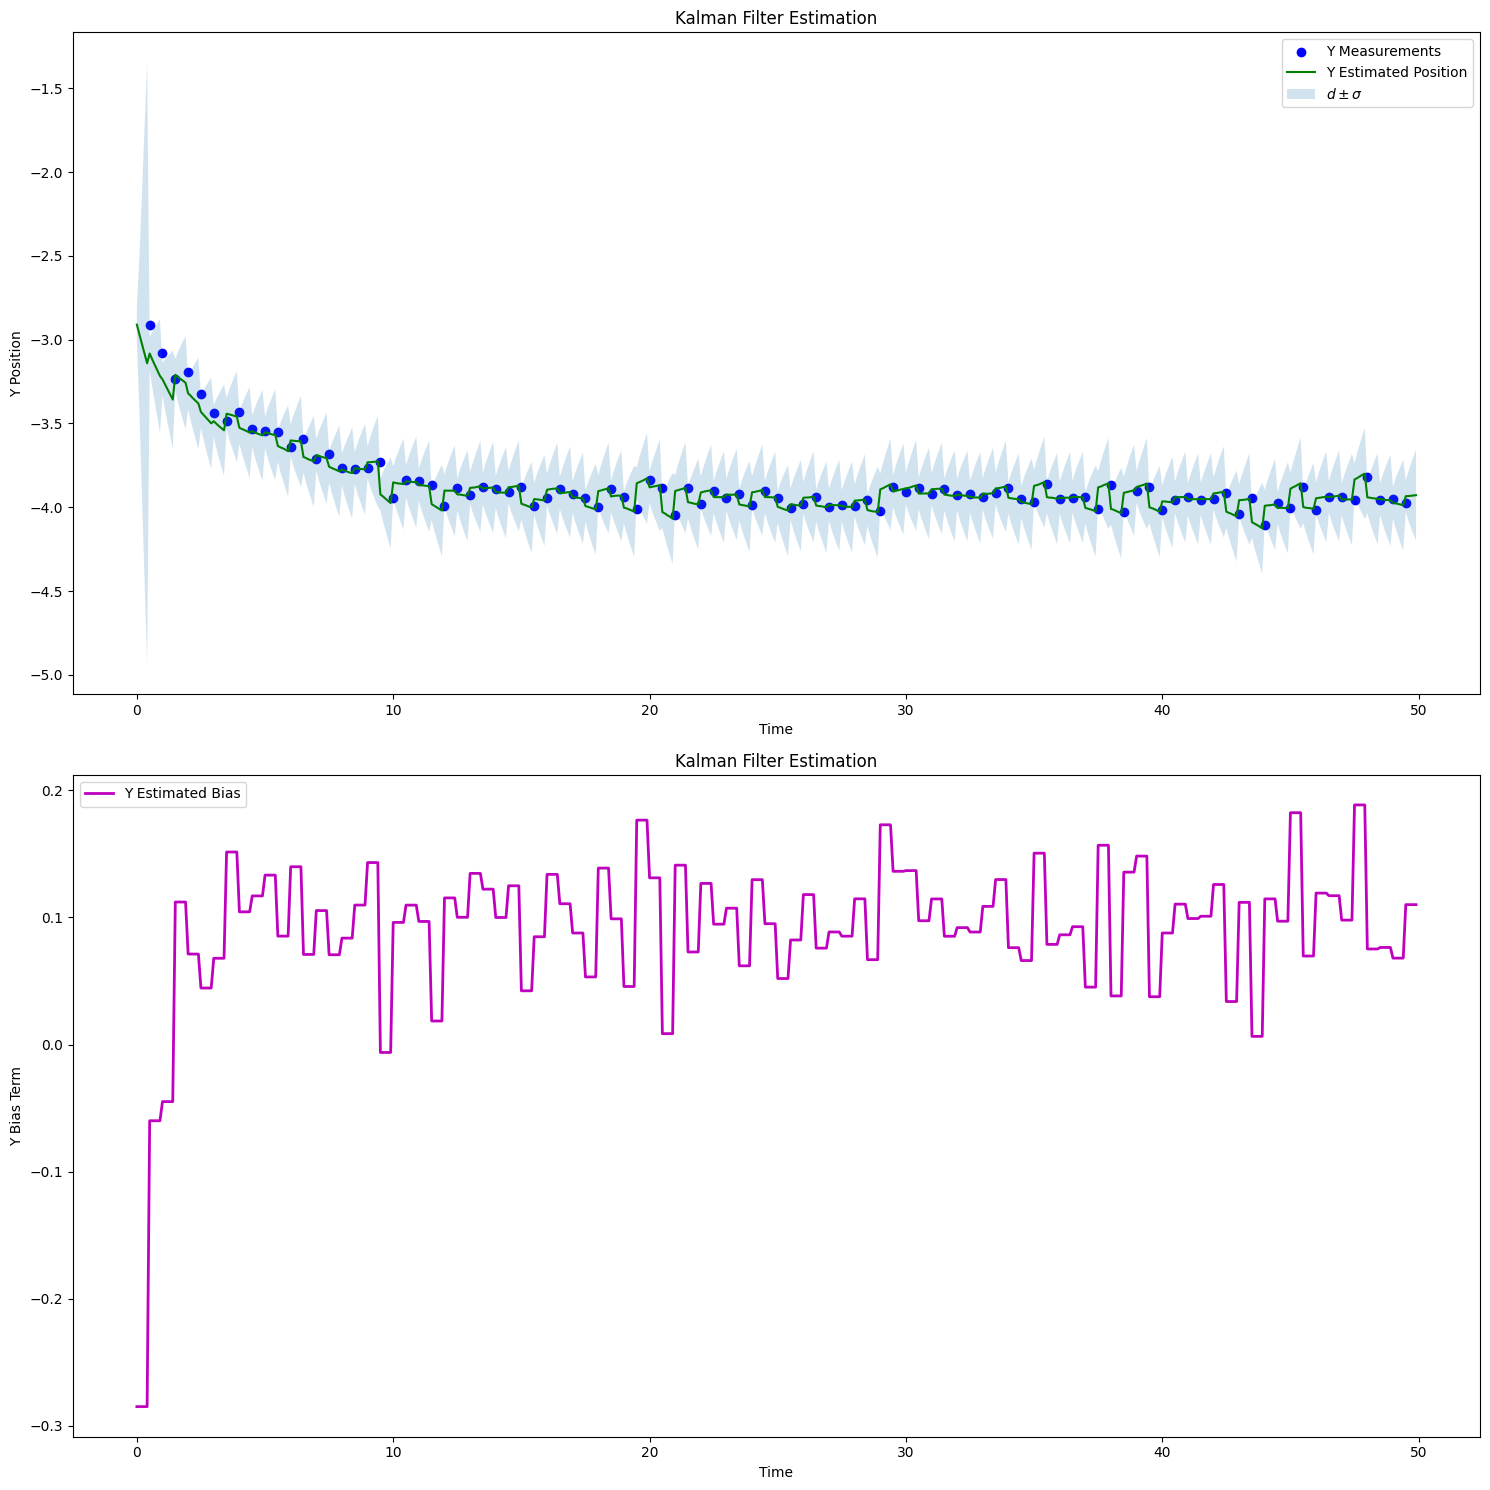

In [618]:
import numpy as np
import matplotlib.pyplot as plt

# Inter sample time
dt = time[1] - time[0]

bias_y = 0
# init state
X = np.array([[0], [bias_y]])

# ini Covar
P = np.array([[1, 0.0],
              [0.0, 1]]) * 20

# state matrix
A = np.array([[1, dt],
              [0.0, 1]])

# input effect matrix
B = np.array([[dt], [0.0]])

# meas matrix
H = np.array([[1.0, 0.0]])

# meas noise
R = np.array([[1.0]]) * 0.01

# process noise
Q = np.array(np.eye(2) * 0.01 )

# Kalman Filter loop

N_iter = len(time)    # implies dt*N_iter seconds

estimated_y = []
estimated_y_bias = []
d_up_time = []
d_dn_time = []
for t in range(0, N_iter):

    # Predict State
    U = np.array([[vy[t]]])
    (X, P) = kf_predict(X, P, A, Q, B, U)

    # Update State
    if t % 5 == 0:
        Z = np.array([[y[t]]])
        (X, P) = kf_update(X, P, Z, H, R)

    # Save the estimated position   for plotting
    estimated_y.append(X[0])
    estimated_y_bias.append(X[1])
    d_up_time.append( X[0].item() + sqrt( P[0][0]).item() )
    d_dn_time.append( X[0].item() - sqrt( P[0][0]).item() )



# End For Loop
estimated_y = np.array(estimated_y)
estimated_y_bias = np.array(estimated_y_bias)

# Convert the array to a numpy array for easier manipulation
arr_np = np.array(y)
arr_np_t = np.array(time)

# Get every 5th element starting from the first index (index 0)
y_1 = arr_np[::5][arr_np[::5] != 0]
t_1 = arr_np_t[::5][arr_np_t[::5] != 0]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Plot X Position estimation
axes[0].scatter(t_1, y_1[:-1], label='Y Measurements', color='blue', marker='o')
axes[0].plot(time, estimated_y, label='Y Estimated Position', color='green')
axes[0].fill_between(time, d_dn_time, d_up_time, alpha=0.2, linewidth=2, label='$d\pm\sigma$')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Y Position')
axes[0].legend()
axes[0].set_title('Kalman Filter Estimation')

# Plot X Bias term estimation
axes[1].plot(time, estimated_y_bias, label='Y Estimated Bias', color='m', linewidth = 2)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Y Bias Term')
axes[1].legend()
axes[1].set_title('Kalman Filter Estimation')

plt.tight_layout()
plt.show()

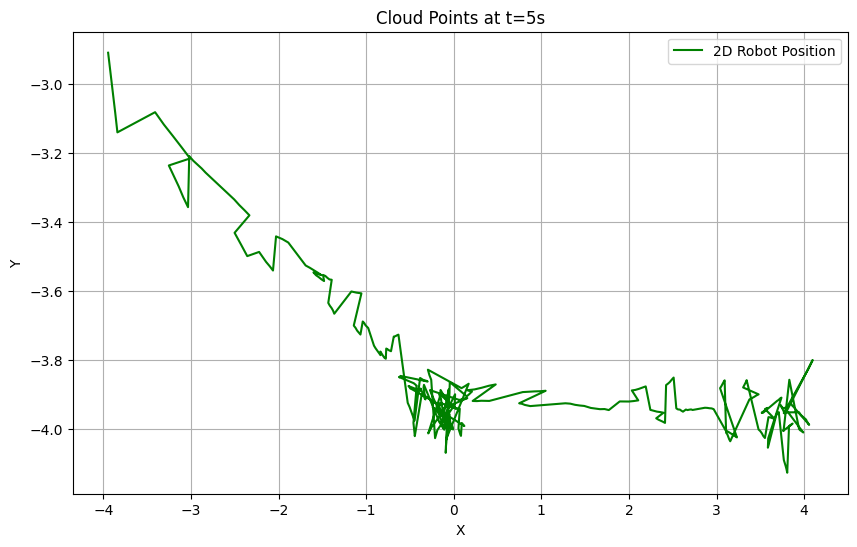

In [619]:
plt.figure(figsize=(10, 6))
plt.plot(estimated_x, estimated_y, label='2D Robot Position', color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cloud Points at t=5s')
plt.grid(True)
plt.legend()
plt.show()

# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

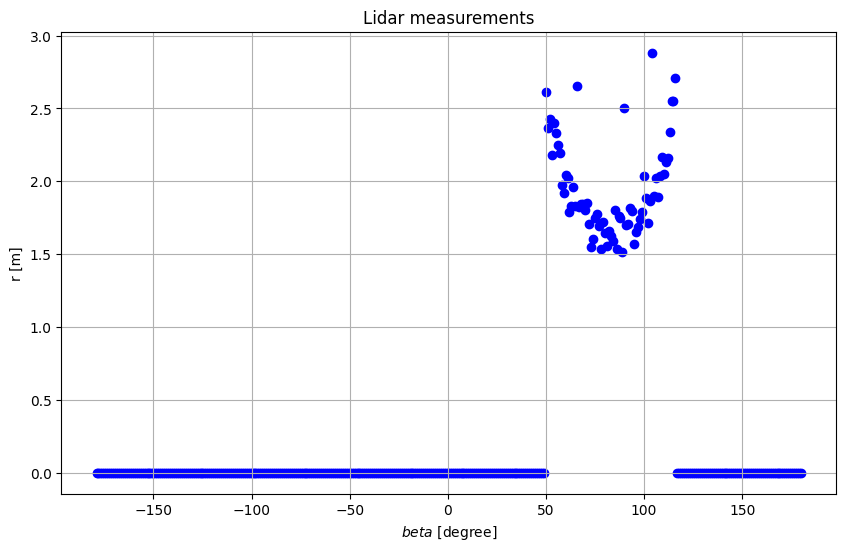

In [620]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure(figsize=(10, 6))
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()

**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data,
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x }
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



In [621]:
# Function to remove outliers measurements based on radius (prev, current, next)
def remove_outliers(r, prev_r, next_r):
    """
    True: Ok
    False: Outlier
    """
    error = 0.65
    if np.abs(r - prev_r) < error and np.abs(r - next_r)< error:
        return True
    return False

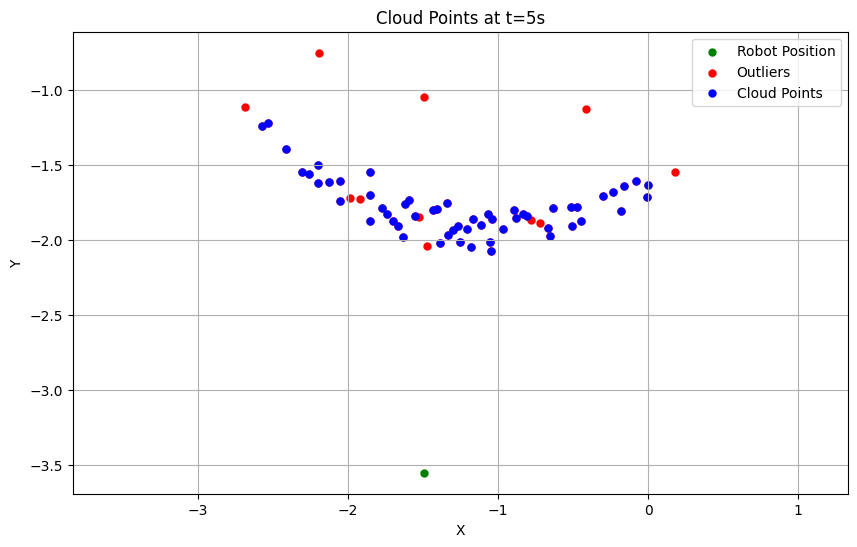

In [622]:
# Define constants
t = 5 * 10  # t = 5 sec * 1/sample_time
max_range = 5

# Initialize lists to store cloud points
x_o, y_o = [], []
x_o_out, y_o_out = [], []

# Iterate over LIDAR measurements in time
for i, r in enumerate(Lidar_range[t]):
    beta = np.deg2rad(i - 179)
    if 0 < r < max_range:
        x_o_out.append(x[t] + r * np.cos(beta))
        y_o_out.append(y[t] + r * np.sin(beta))
        # Removing outliers
        if remove_outliers(Lidar_range[t][i - 1], Lidar_range[t][i], Lidar_range[t][i + 1]):
            x_o.append(x[t] + r * np.cos(beta))
            y_o.append(y[t] + r * np.sin(beta))

# Convert lists to numpy arrays
x_o = np.array(x_o)
y_o = np.array(y_o)
x_o_out = np.array(x_o_out)
y_o_out = np.array(y_o_out)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x[t], y[t], color='g', marker='.', label='Robot Position', linewidth=3)
plt.scatter(x_o_out, y_o_out, color='r', marker='.', label='Outliers', linewidth=3)
plt.scatter(x_o, y_o, color='b', marker='.', label='Cloud Points', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cloud Points at t=5s')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

In [623]:
import numpy as np

def mean_squared_error_by_hand(y_true, y_pred):
    """
    Compute the mean squared error between the actual and predicted values.

    Parameters:
    y_true : array-like
        The actual values.
    y_pred : array-like
        The predicted values.

    Returns:
    mse : float
        The mean squared error.
    """
    # Ensure inputs are converted to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute squared error
    squared_error = np.square(y_true - y_pred)

    # Compute mean squared error
    mse = np.mean(squared_error)

    return mse

Training:
 [[ 1.         -0.00918969]
 [ 1.         -0.00118435]
 [ 1.         -0.18383214]
 [ 1.         -0.08372539]
 [ 1.         -0.15977146]]
Label:
 [[-1.71504059]
 [-1.63781043]
 [-1.80976994]
 [-1.607234  ]
 [-1.64271825]]
 Linear Regression 
Parameters theta =
 [[-1.91778415]
 [-0.10926394]]
SVD:
 s: [161.75008024   9.11593931]


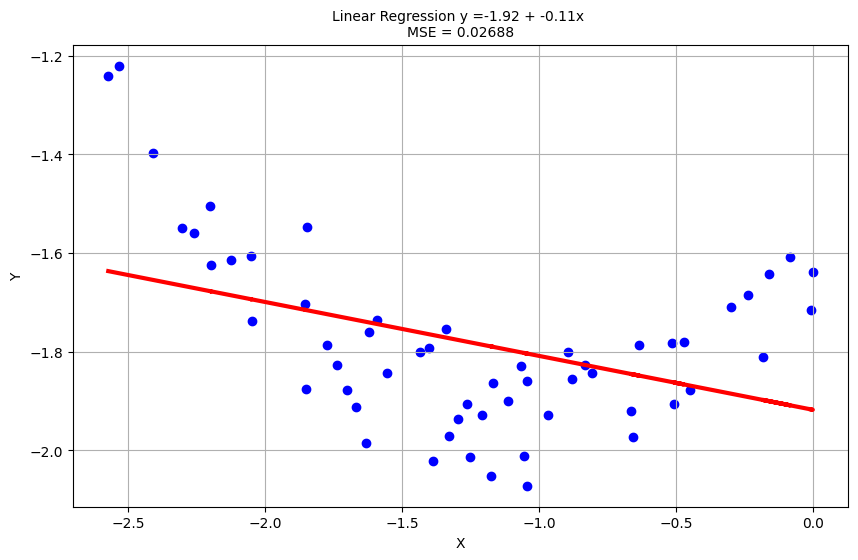

'\n# Confirmation with SKlearn\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\n\n# Perform linear regression\nmodel = LinearRegression()\nmodel.fit(x_o.reshape(-1, 1), y_o)\ny_pred = model.predict(x_o.reshape(-1, 1))\n\n# Calculate mean squared error\nmse = mean_squared_error(y_o, y_pred)\n\n# Obtain optimal parameters theta_0 and theta_1\ntheta_0 = model.intercept_\ntheta_1 = model.coef_[0]\n\n### Plot\nplt.scatter(x_o, y_o, color="blue")\nplt.plot(x_o, Y_predict,  color="red", linewidth=3)\nplt.grid()\n\ntitle = \'MSE = {}\'.format(round(mse,5))\nplt.title(r"Linear Regression y ={:.2f} + {:.2f}x ".format(theta_0, theta_1)\n        + "\n" + title, fontsize=10)\nplt.xlabel(\'X\')\nplt.ylabel(\'Y\')\nplt.show()\n'

In [624]:
# Create X matrix
X = np.ones((len(x_o), 1), dtype=float)
X = np.concatenate((X, x_o.reshape(-1, 1)), axis = 1)

# Create Y matrix
Y = np.array(y_o.reshape(-1, 1))

print("Training:\n", X[:5])
print("Label:\n", Y[:5])

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Parameters theta =\n", theta)

# SVD of the matrix (X.t X)
M = X.T @ X
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s )

# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error_by_hand(Y, Y_predict)

### Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y[:, 0], color="blue")
plt.plot(X[:, 1], Y_predict,  color="red", linewidth=3)
plt.grid()
title = 'MSE = {}'.format(round(MSE,5))
plt.title(r"Linear Regression y ={:.2f} + {:.2f}x ".format(theta[0][0], theta[1][0])
          + "\n" + title, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


"""
# Confirmation with SKlearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Perform linear regression
model = LinearRegression()
model.fit(x_o.reshape(-1, 1), y_o)
y_pred = model.predict(x_o.reshape(-1, 1))

# Calculate mean squared error
mse = mean_squared_error(y_o, y_pred)

# Obtain optimal parameters theta_0 and theta_1
theta_0 = model.intercept_
theta_1 = model.coef_[0]

### Plot
plt.scatter(x_o, y_o, color="blue")
plt.plot(x_o, Y_predict,  color="red", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(mse,5))
plt.title(r"Linear Regression y ={:.2f} + {:.2f}x ".format(theta_0, theta_1)
        + "\n" + title, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
"""



**2.2**
Repeat the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x + \theta_2 x^2 }
 \end{equation}



Training:
 [[ 1.00000000e+00 -9.18969114e-03  8.44504233e-05]
 [ 1.00000000e+00 -1.18435056e-03  1.40268626e-06]
 [ 1.00000000e+00 -1.83832138e-01  3.37942551e-02]
 [ 1.00000000e+00 -8.37253881e-02  7.00994061e-03]
 [ 1.00000000e+00 -1.59771459e-01  2.55269192e-02]]
Label:
 [[-1.71504059]
 [-1.63781043]
 [-1.80976994]
 [-1.607234  ]
 [-1.64271825]]
 Linear Regression 
Parameters theta =
 [[-1.60874795]
 [ 0.59565632]
 [ 0.28145431]]
SVD:
 s: [559.29370562  25.15603176   1.49924195]


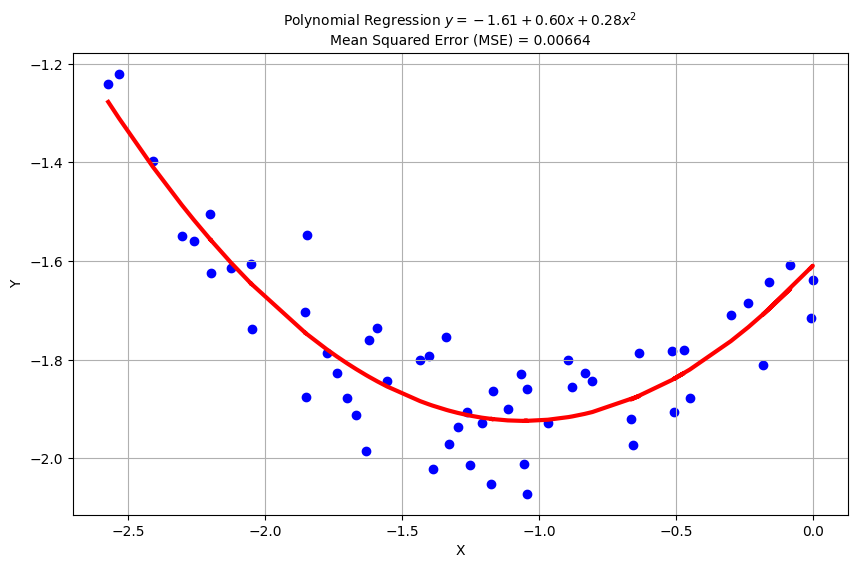

'\n# Confirm with SKlearn\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\n# Generate polynomial features\npoly = PolynomialFeatures(degree=2)\nX_poly = poly.fit_transform(x_o.reshape(-1, 1))\n\n# Fit linear regression model\nmodel = LinearRegression()\nmodel.fit(X_poly, y_o)\n\n# Predict\ny_pred = model.predict(X_poly)\n\n# Calculate mean squared error\nMSE = mean_squared_error(y_o, y_pred)\n\n# Plot\nplt.scatter(x_o, y_o, color=\'blue\', label=\'Data\')\nplt.plot(x_o, y_pred, color=\'red\', label=\'Polynomial Regression (degree=2)\',linewidth=3)\nplt.xlabel(\'X\')\nplt.ylabel(\'Y\')\n# Construct title with regression equation and MSE\ntitle = r"Polynomial Regression $y = {:.2f} + {:.2f}x + {:.2f}x^2$".format(model.intercept_, model.coef_[1], model.coef_[2])\ntitle += "\nMean Squared Error (MSE) = {:.5f}".format(MSE)\nplt.title(title, fontsize=10)\nplt.legend()\nplt.grid(True)\np

In [625]:
# Get x squared
x_o_squared = np.multiply(x_o, x_o).reshape(-1, 1)

# Create X matrix
X = np.ones((len(x_o), 1), dtype=float)
X = np.concatenate((X, x_o.reshape(-1, 1)), axis = 1)
X = np.concatenate((X, x_o_squared), axis = 1)


# Create Y matrix
Y = np.array(y_o.reshape(-1, 1))

print("Training:\n", X[:5])
print("Label:\n", Y[:5])

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Parameters theta =\n", theta)

# SVD of the matrix (X.t X)
M = X.T @ X
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s )

# Precticted values
Y_predict = X @ theta

# Model's error
MSE = mean_squared_error_by_hand(Y, Y_predict)

### Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y[:, 0], color="blue")
plt.plot(X[:, 1], Y_predict,  color="red", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,5))
title = r"Polynomial Regression $y = {:.2f} + {:.2f}x + {:.2f}x^2$".format(theta[0][0], theta[1][0], theta[2][0])
title += "\nMean Squared Error (MSE) = {:.5f}".format(MSE)
plt.title(title, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


"""
# Confirm with SKlearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_o.reshape(-1, 1))

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly, y_o)

# Predict
y_pred = model.predict(X_poly)

# Calculate mean squared error
MSE = mean_squared_error(y_o, y_pred)

# Plot
plt.scatter(x_o, y_o, color='blue', label='Data')
plt.plot(x_o, y_pred, color='red', label='Polynomial Regression (degree=2)',linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
# Construct title with regression equation and MSE
title = r"Polynomial Regression $y = {:.2f} + {:.2f}x + {:.2f}x^2$".format(model.intercept_, model.coef_[1], model.coef_[2])
title += "\nMean Squared Error (MSE) = {:.5f}".format(MSE)
plt.title(title, fontsize=10)
plt.legend()
plt.grid(True)
plt.show()
"""

**2.3**
At this point you can use sklearn!
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




/home/bruno/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.939e-01, tolerance: 1.820e-04
  model = cd_fast.enet_coordinate_descent(


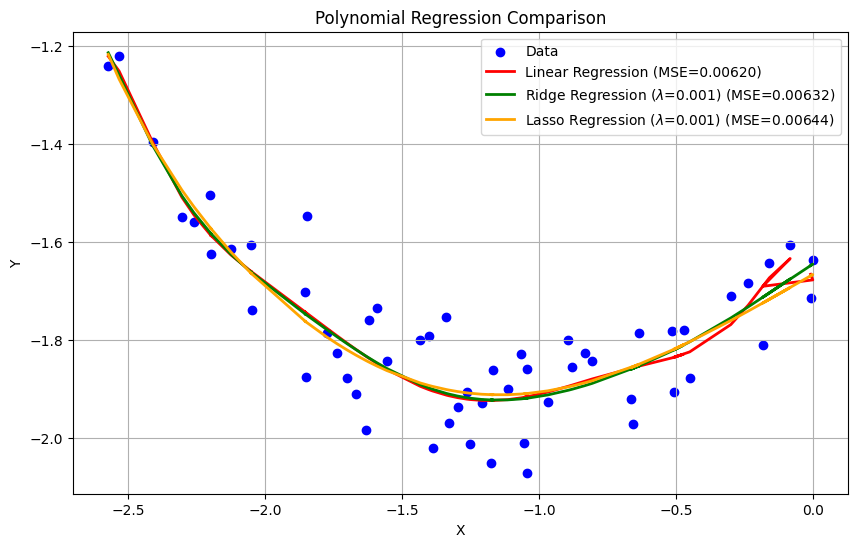

In [626]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


# Generate polynomial features
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(x_o.reshape(-1, 1))

# Fit linear regression model
model_lr = LinearRegression()
model_lr.fit(X_poly, y_o)


# Fit Ridge regression model
alpha_ridge = 0.001  # Ridge regularization parameter
model_ridge = Ridge(alpha=alpha_ridge)
model_ridge.fit(X_poly, y_o)


# Fit Lasso regression model
alpha_lasso = 0.001  # Lasso regularization parameter
model_lasso = Lasso(alpha=alpha_lasso)
model_lasso.fit(X_poly, y_o)


# Predict
y_pred_lr = model_lr.predict(X_poly)
y_pred_ridge = model_ridge.predict(X_poly)
y_pred_lasso = model_lasso.predict(X_poly)


# Calculate mean squared error
MSE_lr = mean_squared_error(y_o, y_pred_lr)
MSE_ridge = mean_squared_error(y_o, y_pred_ridge)
MSE_lasso = mean_squared_error(y_o, y_pred_lasso)


# Plot
plt.figure(figsize=(10, 6))

# Plot data
plt.scatter(x_o, y_o, color='blue', label='Data')

# Plot linear regression
plt.plot(x_o, y_pred_lr, color='red', label='Linear Regression (MSE={:.5f})'.format(MSE_lr), linewidth=2)

# Plot Ridge regression
plt.plot(x_o, y_pred_ridge, color='green', label='Ridge Regression ($\lambda$={}) (MSE={:.5f})'.format(alpha_ridge, MSE_ridge), linewidth=2)

# Plot Lasso regression
plt.plot(x_o, y_pred_lasso, color='orange', label='Lasso Regression ($\lambda$={}) (MSE={:.5f})'.format(alpha_lasso, MSE_lasso), linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Regression Comparison (Degree 10)

In this analysis, we utilized scikit-learn to perform polynomial regression of degree 10 along with Ridge and Lasso regularization techniques.

### Results:

- **Linear Regression:** We fitted a polynomial regression model of degree 10 without any regularization. The resulting model closely follows the training data, resulting in relatively low Mean Squared Error (MSE).

- **Ridge Regression:** Introducing Ridge regularization (L2 regularization) penalizes large coefficients, which helps in reducing overfitting. The Ridge regression model performs slightly better than the unregularized linear regression, evident from the slightly higher MSE (training data not to overfitted).

- **Lasso Regression:** Employing Lasso regularization (L1 regularization) not only mitigates overfitting but also induces sparsity in the model by setting some coefficients to zero. The Lasso regression model yields comparable performance to Ridge regression, showing similar MSE values.

### Conclusion:

- With a polynomial regression of degree 10, the model becomes more flexible and can closely fit the training data. However, this increased flexibility may lead to overfitting, which regularization techniques aim to address.

- Both Ridge and Lasso regularization techniques provide solutions to overfitting by introducing penalties on the size of the coefficients. While Ridge regression penalizes the sum of squares of coefficients (L2 norm), Lasso regression penalizes the sum of absolute values of coefficients (L1 norm).

- In this specific analysis, all three models perform similarly in terms of MSE. However, the choice between them may depend on various factors such as interpretability, computational efficiency, and the specific characteristics of the dataset. For instance, Lasso regression may be preferred when feature selection is desirable due to its ability to set coefficients to zero.

Overall, this analysis highlights the importance of regularization techniques in controlling overfitting and improving the generalization performance of polynomial regression models.


**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for
$\color{green} \theta$.


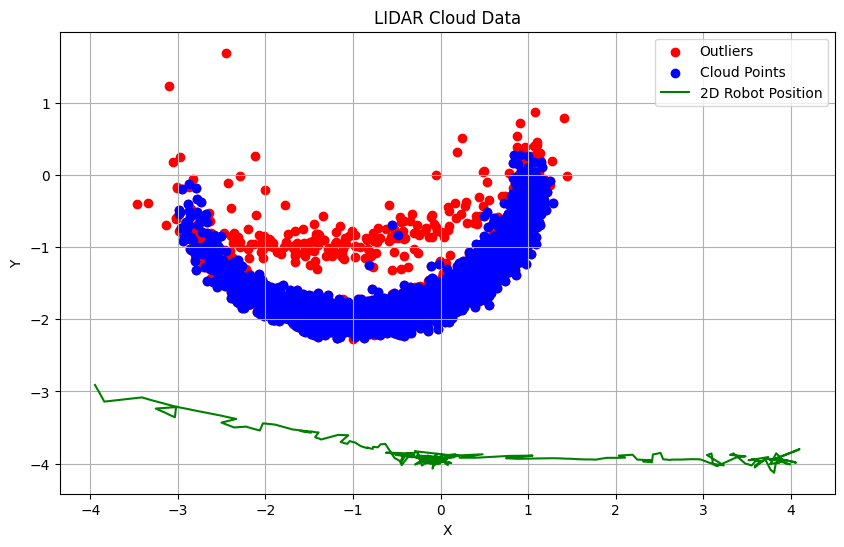

<Figure size 640x480 with 0 Axes>

In [627]:
# LIDAR 2D Cloud Data
x_o_all, y_o_all = [], []
x_o_all_out, y_o_all_out = [], []
max_range = 5

# Iterate over LIDAR measurments in time
for t in range(len(Lidar_range)):
   # Iterate over LIDAR measurements
   for i, r in enumerate(Lidar_range[t]):
     beta = np.deg2rad(i - 179)
     if 0 < r < max_range :
        # All Cloud points
        x_o_all_out.append(x[t] + r * np.cos(beta))
        y_o_all_out.append(y[t] + r * np.sin(beta))
        # Remove outliers
        if remove_outliers(Lidar_range[t][i - 1], Lidar_range[t][i], Lidar_range[t][i + 1]):
           x_o_all.append(x[t] + r * np.cos(beta))
           y_o_all.append(y[t] + r * np.sin(beta))


x_o_all = np.array(x_o_all)
y_o_all = np.array(y_o_all)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_o_all_out, y_o_all_out, color='red', label='Outliers')
plt.scatter(x_o_all, y_o_all, color='blue', label='Cloud Points')
plt.plot(estimated_x, estimated_y, label='2D Robot Position', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LIDAR Cloud Data')
plt.legend()
plt.grid(True)
plt.show()
plt.clf()

In [628]:

# Initialize lists to store cloud points
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Create Y matrix
degree = 10
poly_features = PolynomialFeatures(degree=degree)
X_poly=poly_features.fit_transform(x_o_all.reshape(-1, 1))

# Fit linear regression model
model_lr = LinearRegression()
model_lr.fit(X_poly, y_o_all)

# Fit Ridge regression model
alpha_ridge = 0.001  # Ridge regularization parameter
model_ridge = Ridge(alpha=alpha_ridge)
model_ridge.fit(X_poly, y_o_all)

# Fit Lasso regression model
alpha_lasso = 0.001  # Lasso regularization parameter
model_lasso = Lasso(alpha=alpha_lasso)
model_lasso.fit(X_poly, y_o_all)

# Predict
y_pred_lr = model_lr.predict(X_poly)
y_pred_ridge = model_ridge.predict(X_poly)
y_pred_lasso = model_lasso.predict(X_poly)

# Calculate mean squared error
MSE_lr = mean_squared_error(y_o_all, y_pred_lr)
MSE_ridge = mean_squared_error(y_o_all, y_pred_ridge)
MSE_lasso = mean_squared_error(y_o_all, y_pred_lasso)


print("Theta (LS):\n" ,model_lr.coef_)
print()
print("Theta (LS + Ridge)\n",model_ridge.coef_)
print()
print("Theta (LS + LASSO)\n",model_lasso.coef_)


Theta (LS):
 [ 0.          0.54295738  0.32946085  0.20026735  0.28402943  0.19117455
 -0.02058634 -0.13569889 -0.09539643 -0.02827304 -0.00311116]

Theta (LS + Ridge)
 [ 0.          0.54295495  0.32948093  0.20028372  0.28399239  0.19113959
 -0.02057636 -0.13568016 -0.09539053 -0.02827274 -0.00311123]

Theta (LS + LASSO)
 [ 0.00000000e+00  5.98808188e-01  4.40967060e-01  1.36107310e-01
  2.68908243e-02 -0.00000000e+00  7.42899616e-04 -1.73313548e-04
  2.65725458e-05  1.90514339e-06 -7.83838632e-06]


/home/bruno/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.323e+01, tolerance: 8.138e-02
  model = cd_fast.enet_coordinate_descent(


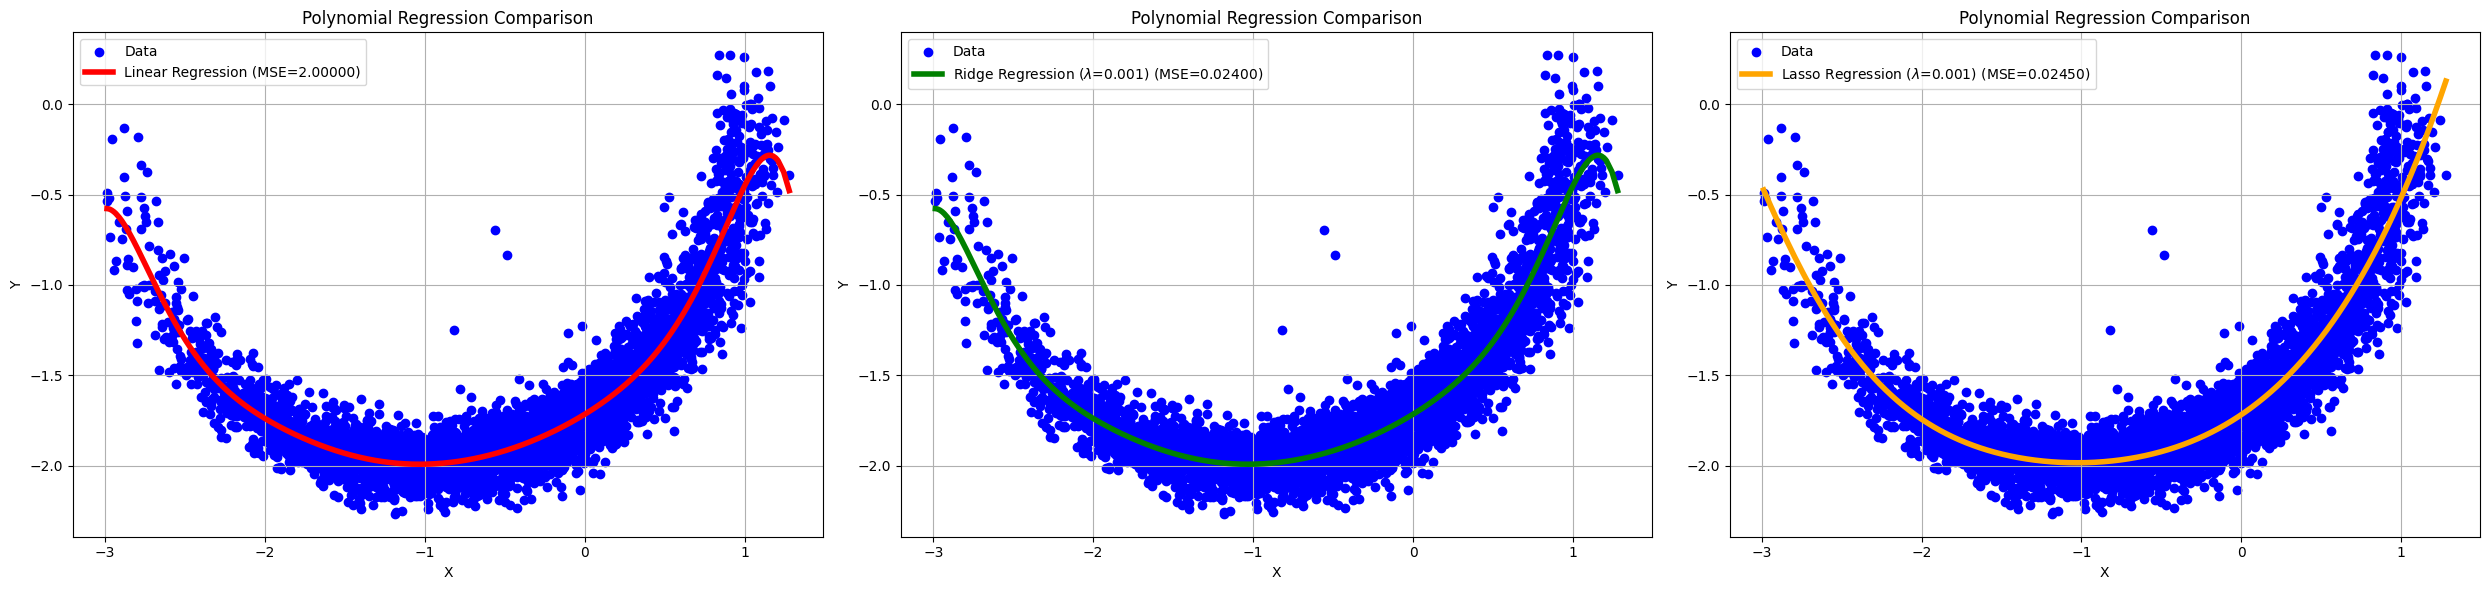

In [629]:
import numpy as np
import matplotlib.pyplot as plt

def plot_with_closest_points(ax, x, y_true, y_pred, color, label, alpha, mse):
    sorted_indices = np.argsort(x)
    x_sorted = np.array(x)[sorted_indices]
    y_pred_sorted = np.array(y_pred)[sorted_indices]

    ax.scatter(x, y_true, color='blue', label='Data')
    ax.plot(x_sorted, y_pred_sorted, color=color, label=label.format(alpha, mse), linewidth=4)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Polynomial Regression Comparison')
    ax.legend()
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plot linear regression
plot_with_closest_points(axes[0], x_o_all, y_o_all, y_pred_lr, 'red', 'Linear Regression (MSE={:.5f})', 2, MSE_lr)

# Plot ridge regression
plot_with_closest_points(axes[1], x_o_all, y_o_all, y_pred_ridge, 'green', 'Ridge Regression ($\lambda$={}) (MSE={:.5f})', alpha_ridge, MSE_ridge)

# Plot lasso regression
plot_with_closest_points(axes[2], x_o_all, y_o_all, y_pred_lasso, 'orange', 'Lasso Regression ($\lambda$={}) (MSE={:.5f})', alpha_lasso, MSE_lasso)

plt.tight_layout()
plt.show()


**2.5 (Extra)**
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

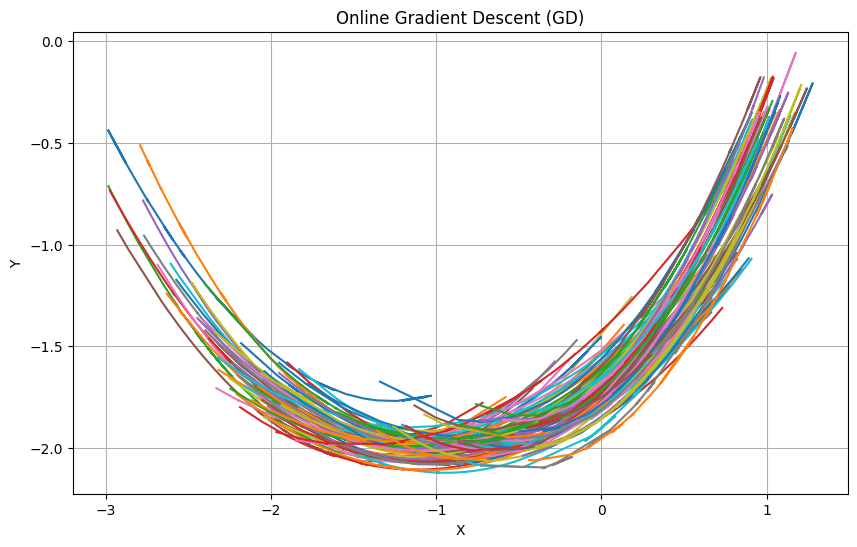

<Figure size 640x480 with 0 Axes>

In [630]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent (GD)
def GD(X_train, Y_train, theta, lrate=0.01, epochs=400):

    # Create X matrix
    X_train = X_train.reshape(len(X_train), 1)
    X = np.ones((len(X_train), 1))
    X = np.concatenate((X, X_train), axis=1)
    X = np.concatenate((X, X_train**2), axis=1)

    # Create Y matrix
    Y = Y_train.reshape(len(Y_train), 1)

    # Compute new theta based on the new batch
    for i in range(epochs):
        # Predict
        Y_predict = X @ theta

        # Residuals
        Y_residuals = Y_predict - Y

        # MSE
        Loss = np.mean(Y_residuals**2)

        # Gradient calculation
        grad_loss = 2 * (X.T @ Y_predict - X.T @ Y) / len(Y_train)

        # Compute new theta
        theta = theta - lrate * grad_loss

    # Return prediction and theta
    return X @ theta, theta

# For future plot
plt.figure(figsize=(10, 6))


# Init theta values
theta = np.array(([0.1, 0.1, 0.1]))
theta = np.reshape(theta, (3, 1))

x_o_all, y_o_all = [], []
max_range = 5
# Iterate over LIDAR measurments in time
for t in range(len(Lidar_range)):
    x_o, y_o = [], []
    for i, r in enumerate(Lidar_range[t]):
        beta = np.deg2rad(i - 179)
        if 0 < r < max_range:
            if remove_outliers(Lidar_range[t][i - 1], Lidar_range[t][i], Lidar_range[t][i + 1]):
                x_o.append(x[t] + r * np.cos(beta))
                y_o.append(y[t] + r * np.sin(beta))
    # Call GD with the entire lists for each time step
    if t % 5 == 0:
        y_predict, theta = GD(np.array(x_o), np.array(y_o), theta)
        plt.plot(x_o, y_predict, label=f't = {t/10}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Online Gradient Descent (GD)')
plt.grid(True)
#plt.legend()
plt.show()
plt.clf()

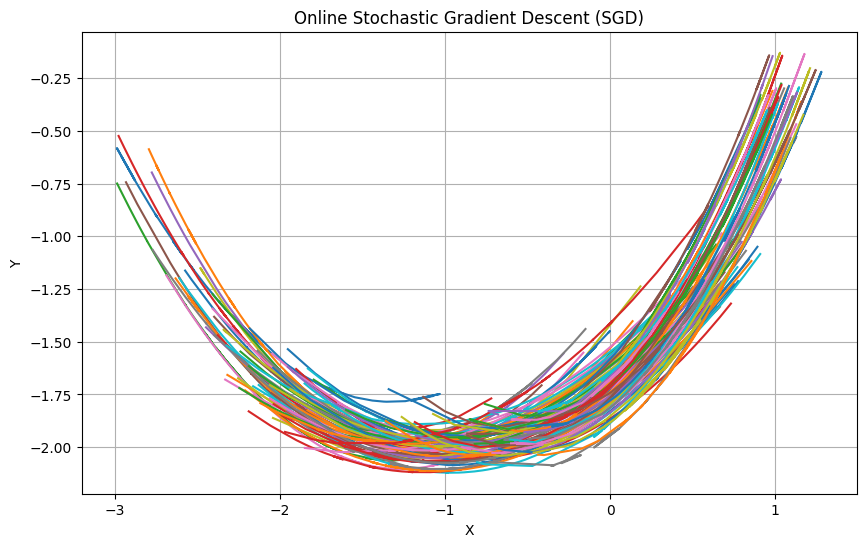

<Figure size 640x480 with 0 Axes>

In [631]:
# To complete

import numpy as np
import matplotlib.pyplot as plt


# Stochastic Gradient Descent (SGD)
def SGD(X_train, Y_train, theta, lrate=0.01, epochs=400):

    # Create X matrix
    X_train = X_train.reshape(len(X_train) ,1)
    X = np.ones((len(X_train), 1), dtype=float)
    X = np.concatenate((X, X_train), axis=1)
    X = np.concatenate((X, X_train**2), axis=1)


    # Create Y matrix
    Y = Y_train.reshape(len(Y_train) ,1)

    # Compute new theta based on the new batch
    for epoch in range(epochs):
        
        # Get random value from batch
        isample = np.random.randint(0, X.shape[0])

        # Predict
        Y_predict = X[isample, :] @ theta

        # Residuals
        Y_residuals = np.subtract(Y_predict, Y[isample])

        # MSE
        Loss = (Y_residuals**2).mean()

        # Gradient calculation
        grad_loss = 2 * (X[isample, :] * Y_predict - X[isample, :]*Y[isample])
        grad_loss = np.reshape(grad_loss, (X.shape[1], 1))

        # Compute new theta
        theta = theta - lrate * grad_loss

    # Return prediction and theta
    return X @ theta, theta


# For future plot
plt.figure(figsize=(10, 6))


# Init theta values
theta = np.array(([0.1, 0.1, 0.1]))
theta = np.reshape(theta, (3, 1))

x_o_all, y_o_all = [], []
max_range = 5
# Iterate over LIDAR measurments in time
for t in range(len(Lidar_range)):
    x_o, y_o = [], []
    # Iterate over LIDAR measurements
    for i, r in enumerate(Lidar_range[t]):
        beta = np.deg2rad(i - 179)
        if 0 < r < max_range:
            if remove_outliers(Lidar_range[t][i - 1], Lidar_range[t][i], Lidar_range[t][i + 1]):
                x_o.append(x[t] + r * np.cos(beta))
                y_o.append(y[t] + r * np.sin(beta))
    # Call SGD with the entire lists for each time step
    if t%5 == 0:
        y_predict,theta = SGD(np.array(x_o), np.array(y_o), theta)
        plt.plot(x_o, y_predict, label=f't = {t/10}')
        

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Online Stochastic Gradient Descent (SGD)')
plt.grid(True)
#plt.legend()
plt.show()
plt.clf()